In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm

%run ../Scripts/analysisMethods.py
%run ../Scripts/supMethods.py
%run ../Scripts/entropy.py
%run ../Scripts/trajectory.py
foldername = "../Data_H/beta0_seed0"

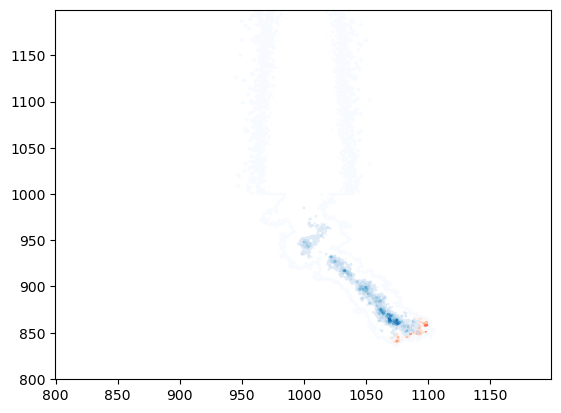

In [2]:
t_dom, foldername, margins = get_tdomain_and_show_last_output(foldername, (-0.35, -0.35))
params, sim_params = read_json(foldername)

In [27]:
%run ../Scripts/fitness.py
%run ../Scripts/mutation.py

In [29]:
entropy_change_time = []
entropy_change_mutation_time = []
entropy_change_growth_time = []
entropy_change_remainder_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[800:]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)
    n_intermediate = virus_growth(n_old, f_norm, params, sim_params)
    n_mutated = mutation(n_intermediate, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)
    entropy_change_remainder = compute_entropy_change(n_new, n_intermediate)
    # entropy_change_mutation = compute_entropy_production_2D_mutation(n_intermediate, params, sim_params)
    entropy_change_mutation = compute_entropy_change(n_mutated, n_intermediate)
    entropy_change = compute_entropy_change(n_new, n_old)

    entropy_change_time.append(entropy_change)
    entropy_change_mutation_time.append(entropy_change_mutation)
    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_remainder_time.append(entropy_change_remainder)
    t_range.append(t)
    n_old = n_new


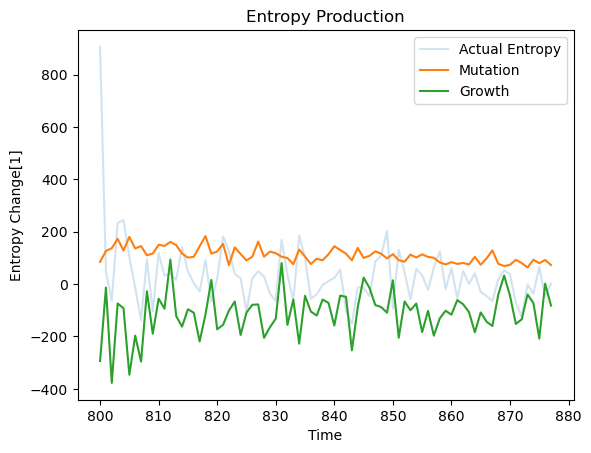

In [30]:
plt.figure()
plt.plot(t_range, entropy_change_time, alpha = 0.2, label = "Actual Entropy")
plt.plot(t_range, entropy_change_mutation_time, label = "Mutation")
plt.plot(t_range, entropy_change_growth_time, label = "Growth")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()

In [31]:
np.mean(entropy_change_growth_time)

-111.49444454887406

In [32]:
np.mean(entropy_change_time)

33.3721896372279

In [33]:
np.mean(entropy_change_mutation_time)

109.94510055002225

In [54]:
%run ../Scripts/entropy.py

In [55]:
entropy_change_growth_time = []
entropy_change_fitness_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[800:]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)

    n_intermediate = virus_growth(n_old, f_norm, params, sim_params)
    f_var = compute_fitness_variance(f_norm, n_old, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)

    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_fitness_time.append(f_var)
    t_range.append(t)
    n_old = n_new

In [68]:
var_f_n = np.sum(np.power(f_norm.toarray(), 2)*n_old.toarray())
mean_f_n = np.sum(f_norm.toarray()*n_old.toarray())

x_ind, y_ind = np.nonzero(n_old)
non_zero_values = n_old[x_ind, y_ind].toarray().squeeze()
non_zero_fitness = f_norm[x_ind, y_ind].toarray().squeeze()
f_log_n = np.sum(non_zero_fitness*non_zero_values*np.log(non_zero_values))

In [74]:
var_f_n+mean_f_n+f_log_n

-5.817499468708573

In [72]:
np.mean(entropy_change_growth_time)

-103.24829504298928

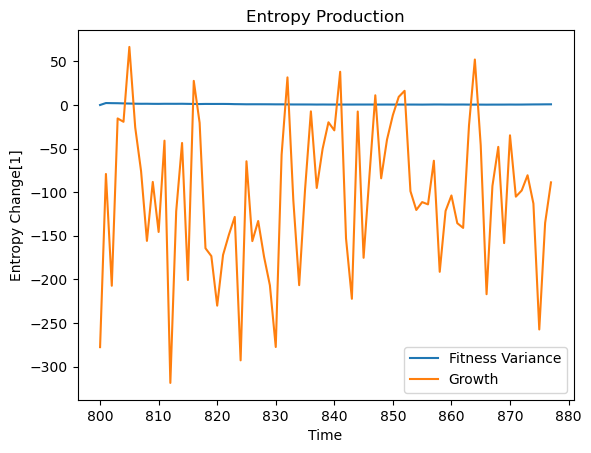

In [73]:
plt.figure()
plt.plot(t_range, entropy_change_fitness_time, label = "Fitness Variance")
plt.plot(t_range, entropy_change_growth_time, label = "Growth")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()